# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**: Iris dataset yang dapat diakses pada kaggle atau melalui link berikut https://www.kaggle.com/datasets/vikrishnan/iris-dataset


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../iris_raw.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# **4. Exploratory Data Analysis (EDA)**

Strategi EDA:
1. Assesing data
2. Analisis Univariate
3. Analisis Bivariate (berdasarkan fitur/kolom target "Species")
4. Analisis Multivariate (berdasarkan fitur/kolom target "Species")

## Assesing data

### Melihat informasi jumlah data non-null dan tipe data tiap kolom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Melihat statistik dataset

In [4]:
df.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


### Melihat data unik tiap fitur/kolom

In [5]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

### Melihat missing value tiap fitur/kolom

In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Melihat data duplikat

In [7]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


### Melihat outlier

In [8]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

outliers_dict = {}
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    outliers = detect_outliers_iqr(df[col])
    if not outliers.empty:
        outliers_dict[col] = outliers

for col, values in outliers_dict.items():
    print(f"Kolom: {col}")
    print(f"Jumlah outlier: {len(values)}")
    print(f"Contoh nilai outlier: {values.values[:5]}")
    print("-" * 40)

Kolom: SepalWidthCm
Jumlah outlier: 4
Contoh nilai outlier: [4.4 4.1 4.2 2. ]
----------------------------------------


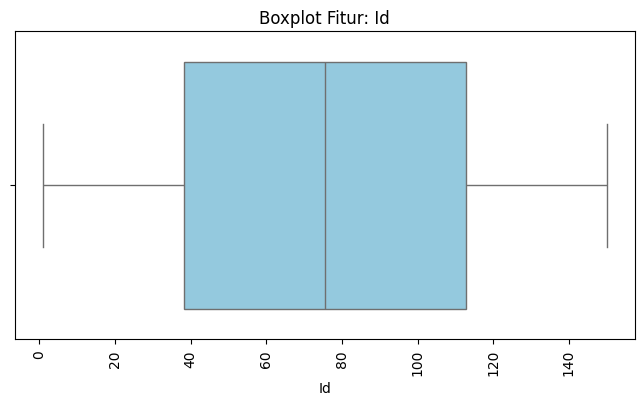

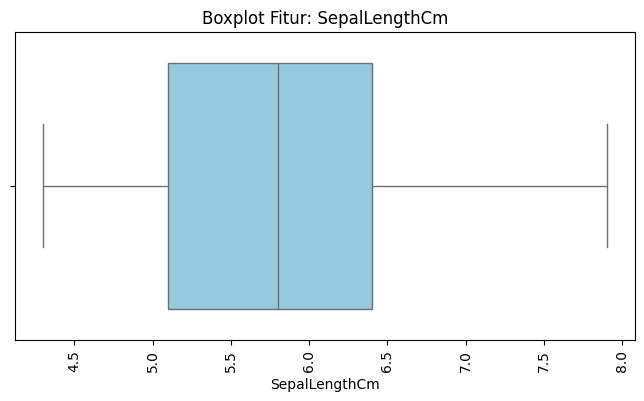

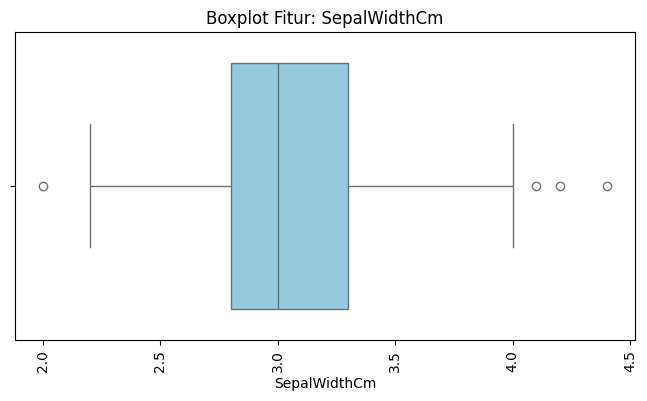

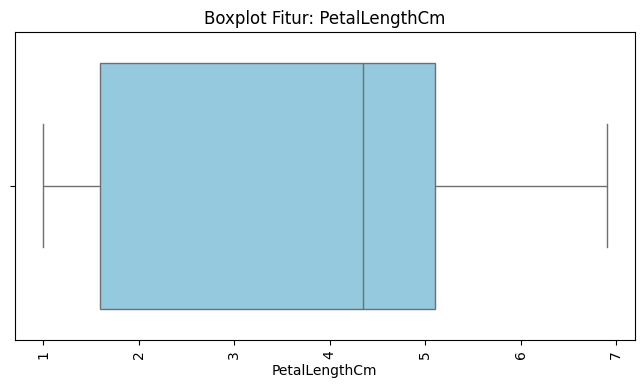

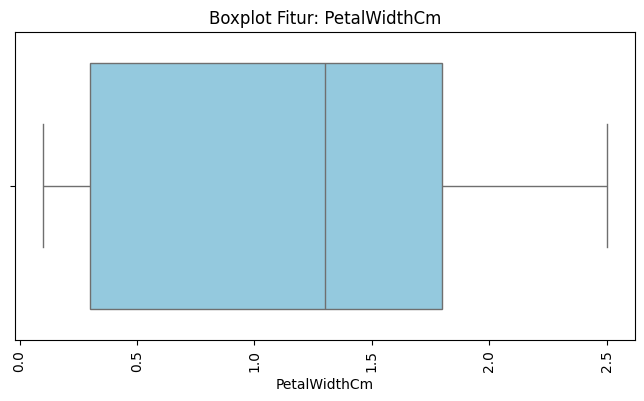

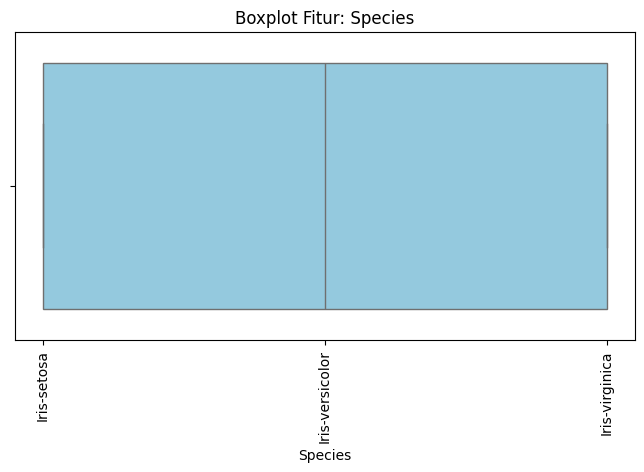

In [9]:
features = df.columns.tolist()

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot Fitur: {feature}')
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.show()
    print("\n")

### Kesimpulan assesing data

1. Proyek ini menggunakan dataset iris yang diambil dari kaggle berisi 150 baris data dan 6 fitur/kolom
2. Penjabaran tiap fitur/kolom:
   - Id: nomor id tiap baris data (int/numerik)
   - SepalLengthCm: panjang sepal dalam centimeter (float/numerik)
   - SepalWidthCm: lebar sepal dalam centimeter (float/numerik)
   - PetalLengthCm: panjang petal dalam centimeter (float/numerik)
   - PetalWidthCm: lebar petal dalam centimeter (float/numerik)
   - Species: spesies dari bunga iris (object/kategori)
3. berdasarkan pengamatan jumlah data unik dataset tidak menunjukan adanya kejanggalan
4. tidak terdapat data yang hilang atau tidak terisi
5. tidak terdapat data duplikat
6. terdapat outlier pada fitur/kolom SepalWidthCm

## Analisis Univariate

### Membuat pivot tabel dan visualisasi

Distribusi untuk fitur: SepalLengthCm
               jumlah sampel  persentase (%)
SepalLengthCm                               
4.3                        1             0.7
4.4                        3             2.0
4.5                        1             0.7
4.6                        4             2.7
4.7                        2             1.3
4.8                        5             3.3
4.9                        6             4.0
5.0                       10             6.7
5.1                        9             6.0
5.2                        4             2.7
5.3                        1             0.7
5.4                        6             4.0
5.5                        7             4.7
5.6                        6             4.0
5.7                        8             5.3
5.8                        7             4.7
5.9                        3             2.0
6.0                        6             4.0
6.1                        6             4.0
6.2              

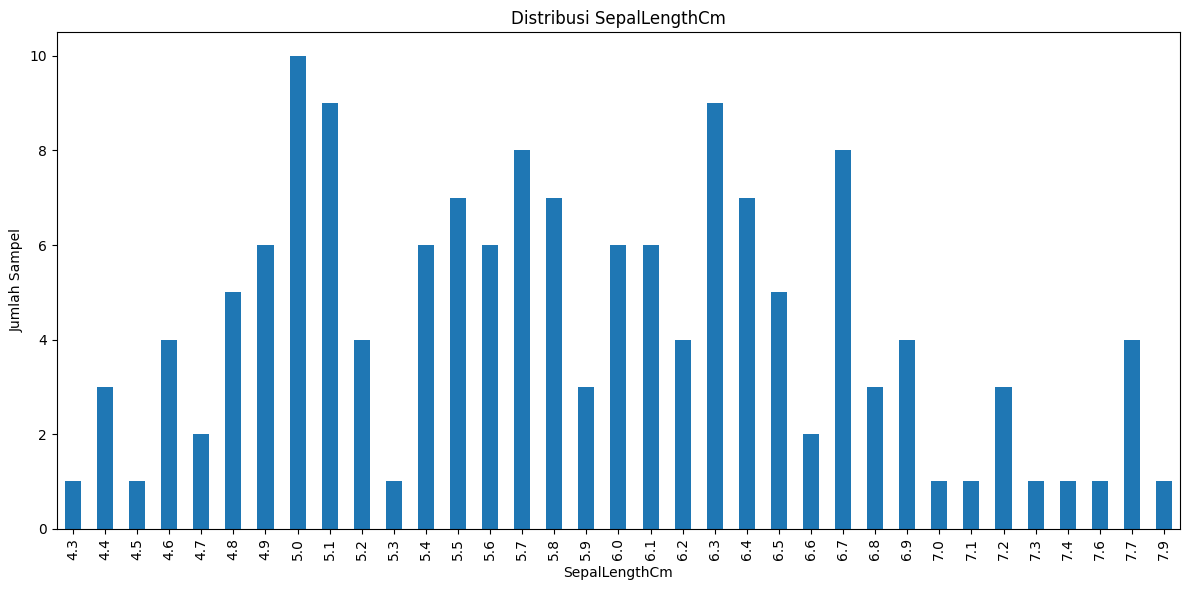



Distribusi untuk fitur: SepalWidthCm
              jumlah sampel  persentase (%)
SepalWidthCm                               
2.0                       1             0.7
2.2                       3             2.0
2.3                       4             2.7
2.4                       3             2.0
2.5                       8             5.3
2.6                       5             3.3
2.7                       9             6.0
2.8                      14             9.3
2.9                      10             6.7
3.0                      26            17.3
3.1                      12             8.0
3.2                      13             8.7
3.3                       6             4.0
3.4                      12             8.0
3.5                       6             4.0
3.6                       3             2.0
3.7                       3             2.0
3.8                       6             4.0
3.9                       2             1.3
4.0                       1          

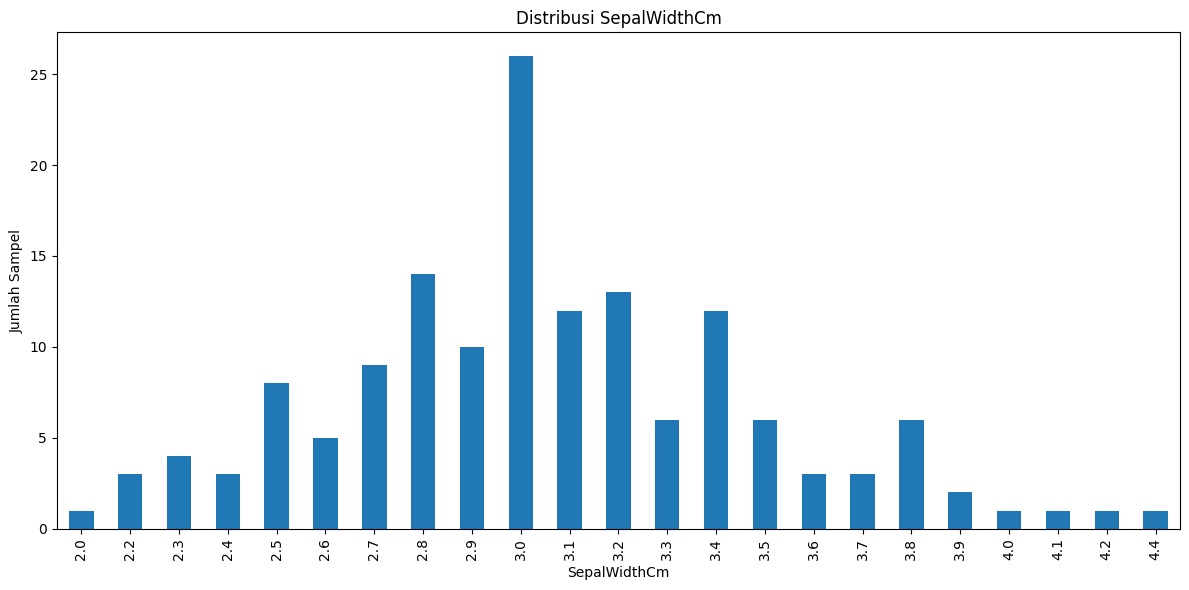



Distribusi untuk fitur: PetalLengthCm
               jumlah sampel  persentase (%)
PetalLengthCm                               
1.0                        1             0.7
1.1                        1             0.7
1.2                        2             1.3
1.3                        7             4.7
1.4                       12             8.0
1.5                       14             9.3
1.6                        7             4.7
1.7                        4             2.7
1.9                        2             1.3
3.0                        1             0.7
3.3                        2             1.3
3.5                        2             1.3
3.6                        1             0.7
3.7                        1             0.7
3.8                        1             0.7
3.9                        3             2.0
4.0                        5             3.3
4.1                        3             2.0
4.2                        4             2.7
4.3            

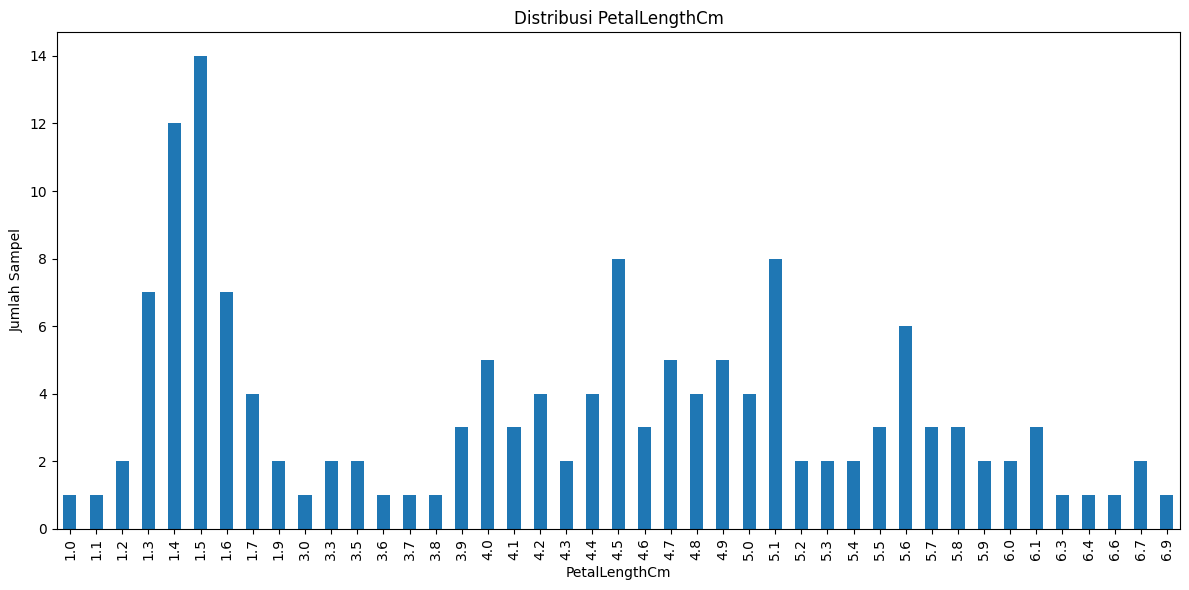



Distribusi untuk fitur: PetalWidthCm
              jumlah sampel  persentase (%)
PetalWidthCm                               
0.1                       6             4.0
0.2                      28            18.7
0.3                       7             4.7
0.4                       7             4.7
0.5                       1             0.7
0.6                       1             0.7
1.0                       7             4.7
1.1                       3             2.0
1.2                       5             3.3
1.3                      13             8.7
1.4                       8             5.3
1.5                      12             8.0
1.6                       4             2.7
1.7                       2             1.3
1.8                      12             8.0
1.9                       5             3.3
2.0                       6             4.0
2.1                       6             4.0
2.2                       3             2.0
2.3                       8          

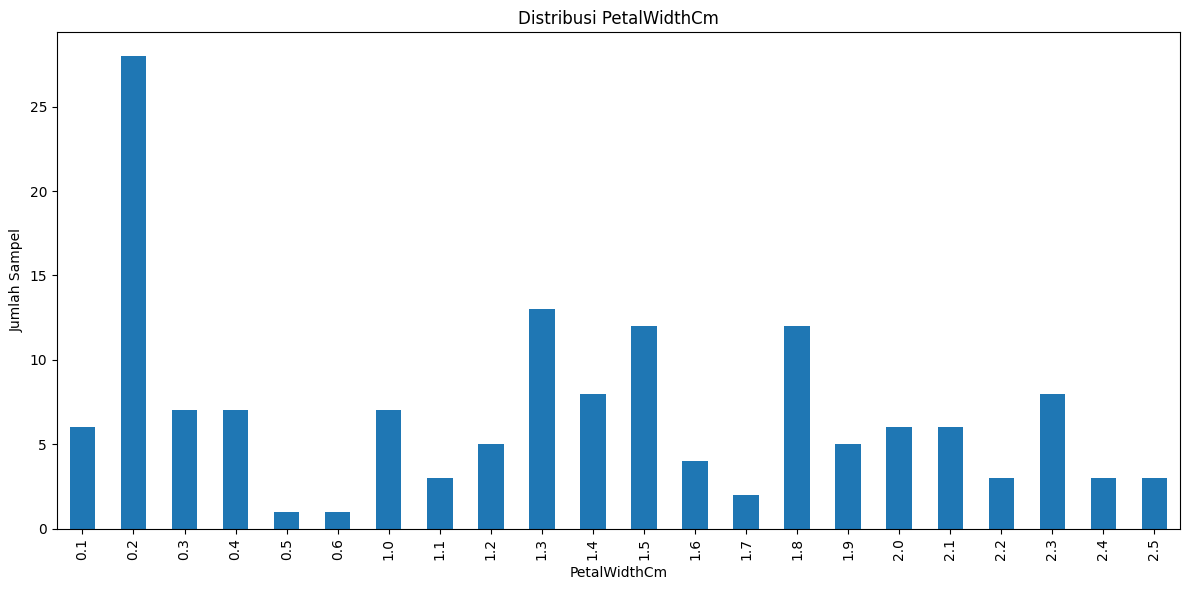



Distribusi untuk fitur: Species
                 jumlah sampel  persentase (%)
Species                                       
Iris-setosa                 50            33.3
Iris-versicolor             50            33.3
Iris-virginica              50            33.3


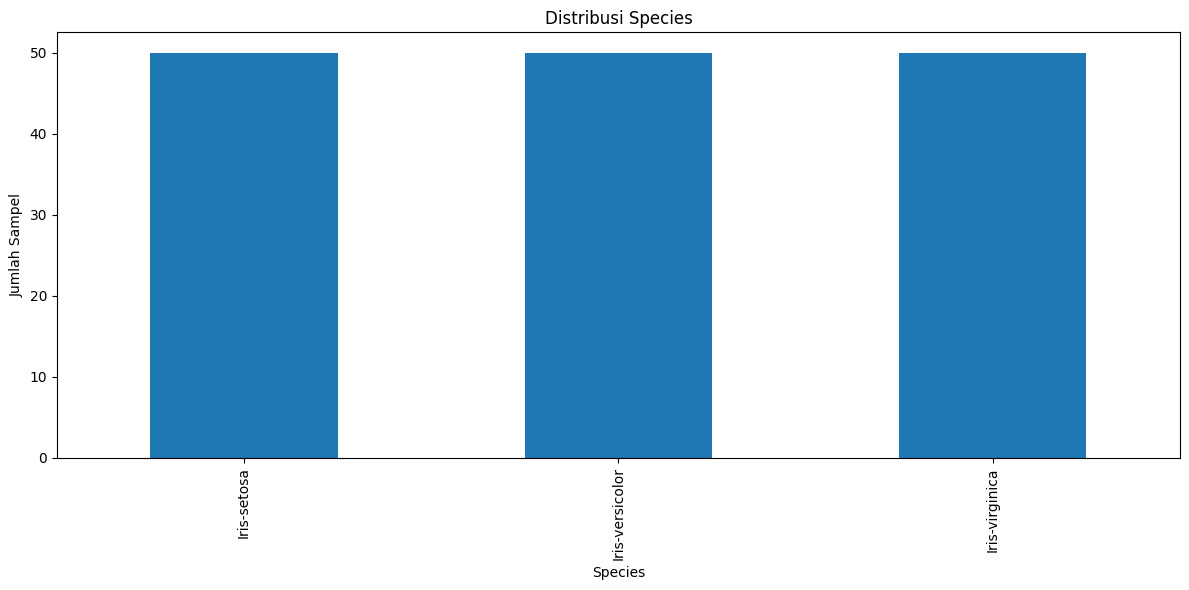

In [10]:
features = df.select_dtypes(include=['int64', 'float64', 'object']).columns.tolist()
features.remove('Id')

for col in features:
    count = df[col].value_counts().sort_index()
    percent = 100 * df[col].value_counts(normalize=True).sort_index()

    pivot = pd.DataFrame({'jumlah sampel': count, 'persentase (%)': percent.round(1)})

    print(f"Distribusi untuk fitur: {col}")
    print(pivot)

    plt.figure(figsize=(12, 6))
    count.plot(kind='bar', title=f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah Sampel')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    print("\n")

### Kesimpulan analisis univariate

1. SepalLengthCm: Distribusi panjang sepal (dalam cm) menunjukkan variasi yang cukup luas, mulai dari 4.3 cm hingga 7.9 cm. Nilai yang paling umum muncul adalah 5.0 cm (6.7%), 5.1 cm (6.0%), dan 6.3 cm (6.0%), sementara nilai ekstrem seperti 4.3 cm dan 7.9 cm sangat jarang (masing-masing 0.7%). Distribusi ini cenderung multimodal dengan beberapa puncak, menunjukkan kemungkinan adanya pengelompokan alami dalam data.  
2. SepalWidthCm: Lebar sepal (dalam cm) berkisar antara 2.0 cm hingga 4.4 cm, dengan nilai paling dominan pada 3.0 cm (17.3%). Distribusi ini relatif simetris dengan konsentrasi di sekitar 2.8 cm hingga 3.2 cm, sementara nilai di bawah 2.5 cm atau di atas 3.5 cm lebih jarang. Ada lonjakan signifikan pada 3.0 cm, yang mungkin menunjukkan karakteristik umum dari sebagian besar sampel.  
3. PetalLengthCm: Panjang kelopak (dalam cm) memiliki rentang yang lebar, dari 1.0 cm hingga 6.9 cm, dengan dua kelompok utama: satu di sekitar 1.0–1.7 cm (frekuensi tinggi, seperti 1.4 cm dan 1.5 cm) dan satu lagi di sekitar 4.0–5.6 cm (misalnya, 4.5 cm dan 5.1 cm masing-masing 5.3%). Hal ini mengindikasikan kemungkinan dua kelompok berbeda dalam data, yang mungkin berkorelasi dengan spesies bunga.  
4. PetalWidthCm: Lebar kelopak (dalam cm) bervariasi dari 0.1 cm hingga 2.5 cm, dengan dua puncak utama: satu di 0.2 cm (18.7%) dan satu lagi di 1.3 cm (8.7%) serta 1.8 cm (8.0%). Distribusi ini menunjukkan bimodalitas yang kuat, dengan nilai-nilai ekstrem seperti 0.1 cm dan 2.5 cm yang sangat jarang. Pola ini mungkin mencerminkan perbedaan signifikan antara spesies bunga dalam dataset.  
5. Species: Dataset ini seimbang sempurna untuk fitur spesies, dengan tiga kategori (Iris-setosa, Iris-versicolor, dan Iris-virginica) masing-masing memiliki 50 sampel (33.3%). Keseimbangan ini memudahkan analisis klasifikasi karena tidak ada ketidakseimbangan kelas yang perlu ditangani. Distribusi yang merata juga menunjukkan bahwa data dapat mewakili ketiga spesies secara adil.

## Analisis Bivariate

### Membuat pivot tabel dan visualisasi

Pivot Table: Distribusi Species berdasarkan 'SepalLengthCm'


Species,Iris-setosa,Iris-versicolor,Iris-virginica
SepalLengthCm,,,
4.3,1,0,0
4.4,3,0,0
4.5,1,0,0
4.6,4,0,0
4.7,2,0,0
4.8,5,0,0
4.9,4,1,1
5.0,8,2,0
5.1,8,1,0


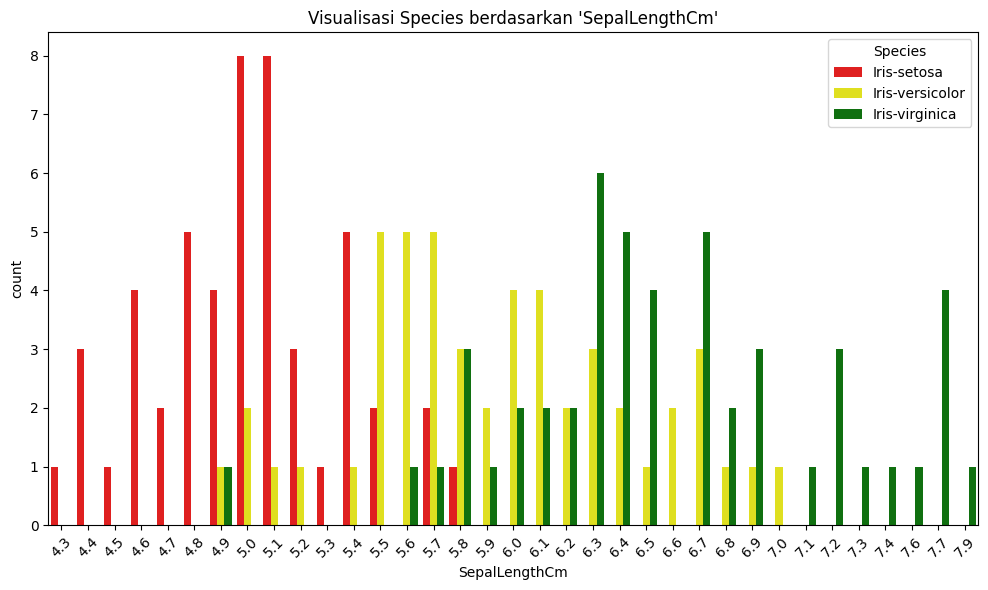



Pivot Table: Distribusi Species berdasarkan 'SepalWidthCm'


Species,Iris-setosa,Iris-versicolor,Iris-virginica
SepalWidthCm,,,
2.0,0,1,0
2.2,0,2,1
2.3,1,3,0
2.4,0,3,0
2.5,0,4,4
2.6,0,3,2
2.7,0,5,4
2.8,0,6,8
2.9,1,7,2


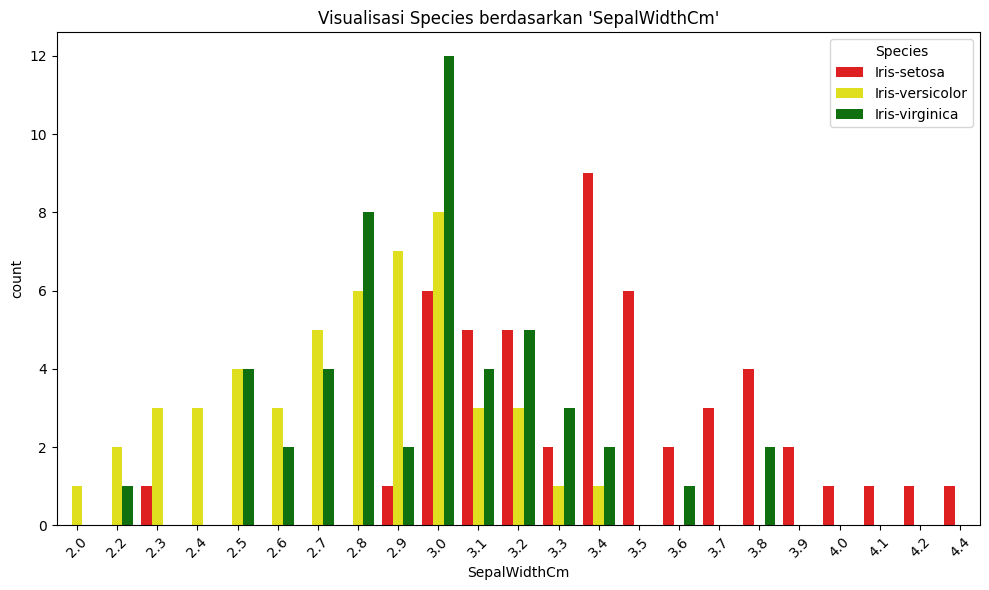



Pivot Table: Distribusi Species berdasarkan 'PetalLengthCm'


Species,Iris-setosa,Iris-versicolor,Iris-virginica
PetalLengthCm,,,
1.0,1,0,0
1.1,1,0,0
1.2,2,0,0
1.3,7,0,0
1.4,12,0,0
1.5,14,0,0
1.6,7,0,0
1.7,4,0,0
1.9,2,0,0


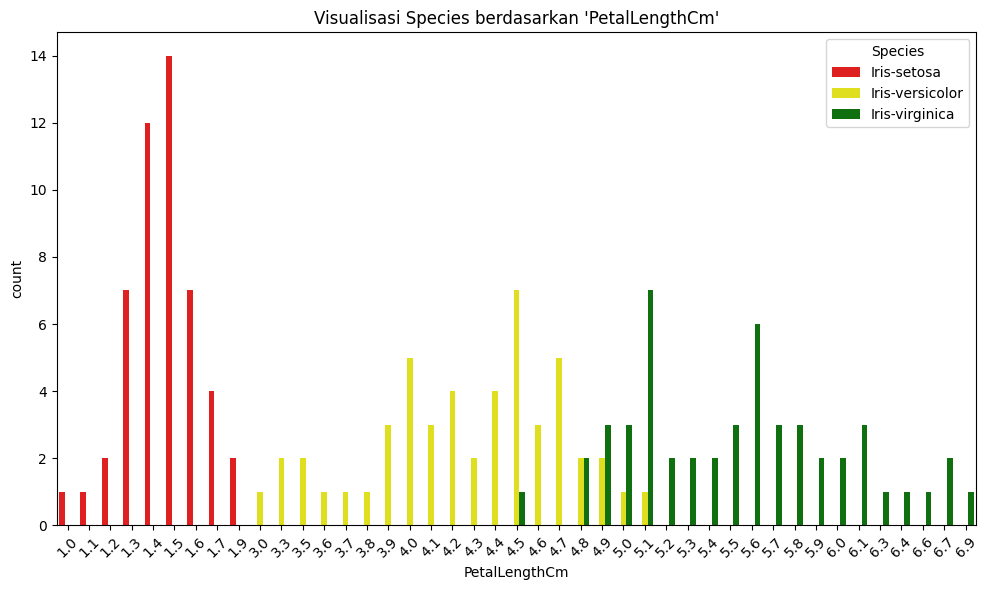



Pivot Table: Distribusi Species berdasarkan 'PetalWidthCm'


Species,Iris-setosa,Iris-versicolor,Iris-virginica
PetalWidthCm,,,
0.1,6,0,0
0.2,28,0,0
0.3,7,0,0
0.4,7,0,0
0.5,1,0,0
0.6,1,0,0
1.0,0,7,0
1.1,0,3,0
1.2,0,5,0


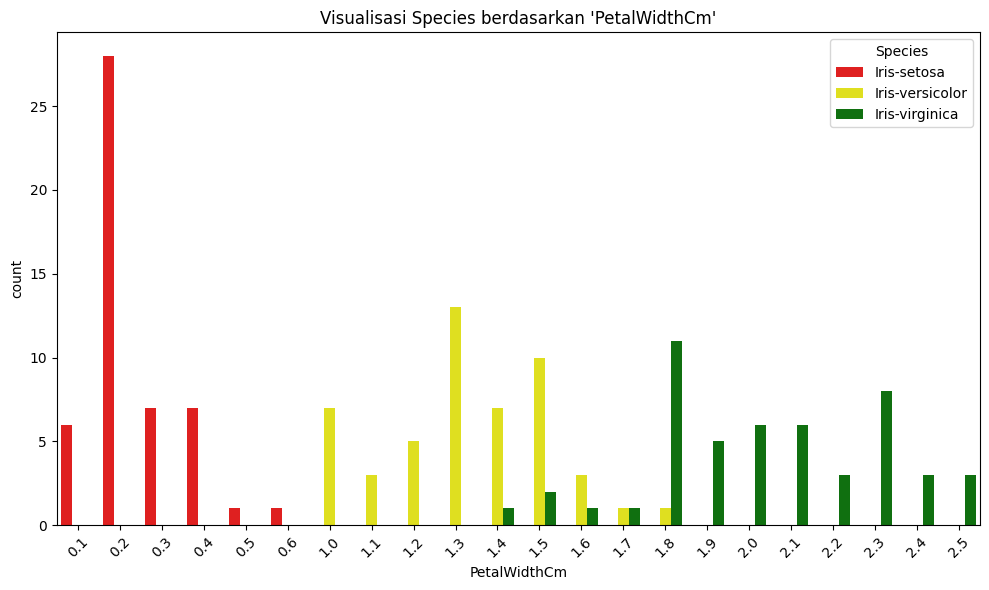

In [11]:
features.remove('Species')

status_order = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

status_palette = {"Iris-setosa": "red", "Iris-versicolor": "yellow", "Iris-virginica": "green"}

for col in features:
    pivot = (
        df
        .groupby([col, "Species"])
        .size()
        .unstack(fill_value=0)
    )

    print(f"Pivot Table: Distribusi Species berdasarkan '{col}'")
    display(pivot)

    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=df,
        x=col,
        hue="Species",
        order=sorted(df[col].dropna().unique()),
        hue_order=status_order,
        palette=status_palette
    )
    plt.title(f"Visualisasi Species berdasarkan '{col}'")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\n")

### Kesimpulan analisis bivariate

1. Analisis Distribusi Species Berdasarkan SepalLengthCm: Distribusi panjang sepal (SepalLengthCm) menunjukkan pola yang jelas terkait spesies. Iris-setosa mendominasi pada rentang pendek (4.3–5.4 cm), dengan hampir semua sampel di bawah 5.5 cm milik spesies ini. Iris-versicolor mulai muncul dari 4.9 cm tetapi dominan di 5.5–6.5 cm, sementara Iris-virginica mendominasi di atas 6.0 cm, terutama pada 6.3–7.9 cm. Ada sedikit tumpang tindih di 5.5–6.0 cm, di mana kedua spesies non-setosa muncul bersamaan. Hal ini menunjukkan bahwa SepalLengthCm dapat menjadi pembeda yang baik, terutama untuk memisahkan setosa dari dua spesies lainnya.
2. Analisis Distribusi Species Berdasarkan SepalWidthCm: Lebar sepal (SepalWidthCm) menunjukkan distribusi yang lebih tumpang tindih antarspesies. Iris-setosa cenderung memiliki sepal yang lebih lebar (terutama di 3.0–3.5 cm), sementara versicolor dan virginica lebih tersebar di rentang 2.0–3.2 cm. Iris-virginica memiliki kecenderungan sedikit lebih lebar daripada versicolor, tetapi perbedaannya tidak terlalu jelas. Beberapa nilai seperti 2.8 cm dan 3.0 cm mengandung sampel dari ketiga spesies, menunjukkan bahwa SepalWidthCm kurang efektif sebagai pembeda tunggal dibandingkan fitur lainnya.
3. Analisis Distribusi Species Berdasarkan PetalLengthCm: Panjang kelopak (PetalLengthCm) memberikan pemisahan yang sangat jelas antarspesies. Iris-setosa hanya muncul di rentang 1.0–1.9 cm, versicolor mendominasi 3.0–5.1 cm, dan virginica hampir eksklusif di atas 4.5 cm. Ada sedikit overlap di 4.5–5.1 cm, di mana kedua spesies non-setosa muncul, tetapi secara keseluruhan, fitur ini sangat informatif untuk klasifikasi. Pemisahan yang tajam ini menjadikan PetalLengthCm salah satu fitur terpenting dalam membedakan spesies iris.
4. Analisis Distribusi Species Berdasarkan PetalWidthCm: Lebar kelopak (PetalWidthCm) juga menunjukkan segregasi yang kuat. Iris-setosa hanya muncul di rentang sangat sempit (0.1–0.6 cm), versicolor mendominasi 1.0–1.6 cm, dan virginica hampir seluruhnya di atas 1.8 cm. Overlap minimal terjadi di 1.4–1.8 cm, tetapi secara umum, fitur ini sangat diskriminatif. PetalWidthCm dan PetalLengthCm bersama-sama dapat menjadi penentu utama dalam mengidentifikasi spesies, karena keduanya menunjukkan perbedaan yang jelas antar-kelompok.
5. Kesimpulan Umum: Dari analisis ini, terlihat bahwa fitur kelopak (PetalLengthCm dan PetalWidthCm) memberikan pemisahan terbaik antarspesies, sementara fitur sepal (SepalLengthCm dan SepalWidthCm) berguna tetapi memiliki lebih banyak overlap. Iris-setosa mudah dibedakan karena karakteristik kelopaknya yang kecil, sedangkan versicolor dan virginica dapat dipisahkan dengan kombinasi panjang/lebar kelopak dan sepal yang lebih besar.

## Analisis multivariate

### Mapping sementara fitur/kolom Species

In [12]:
df_multi = df.copy()

species_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

df_multi['Species'] = df_multi['Species'].map(species_mapping)

### Pairplot

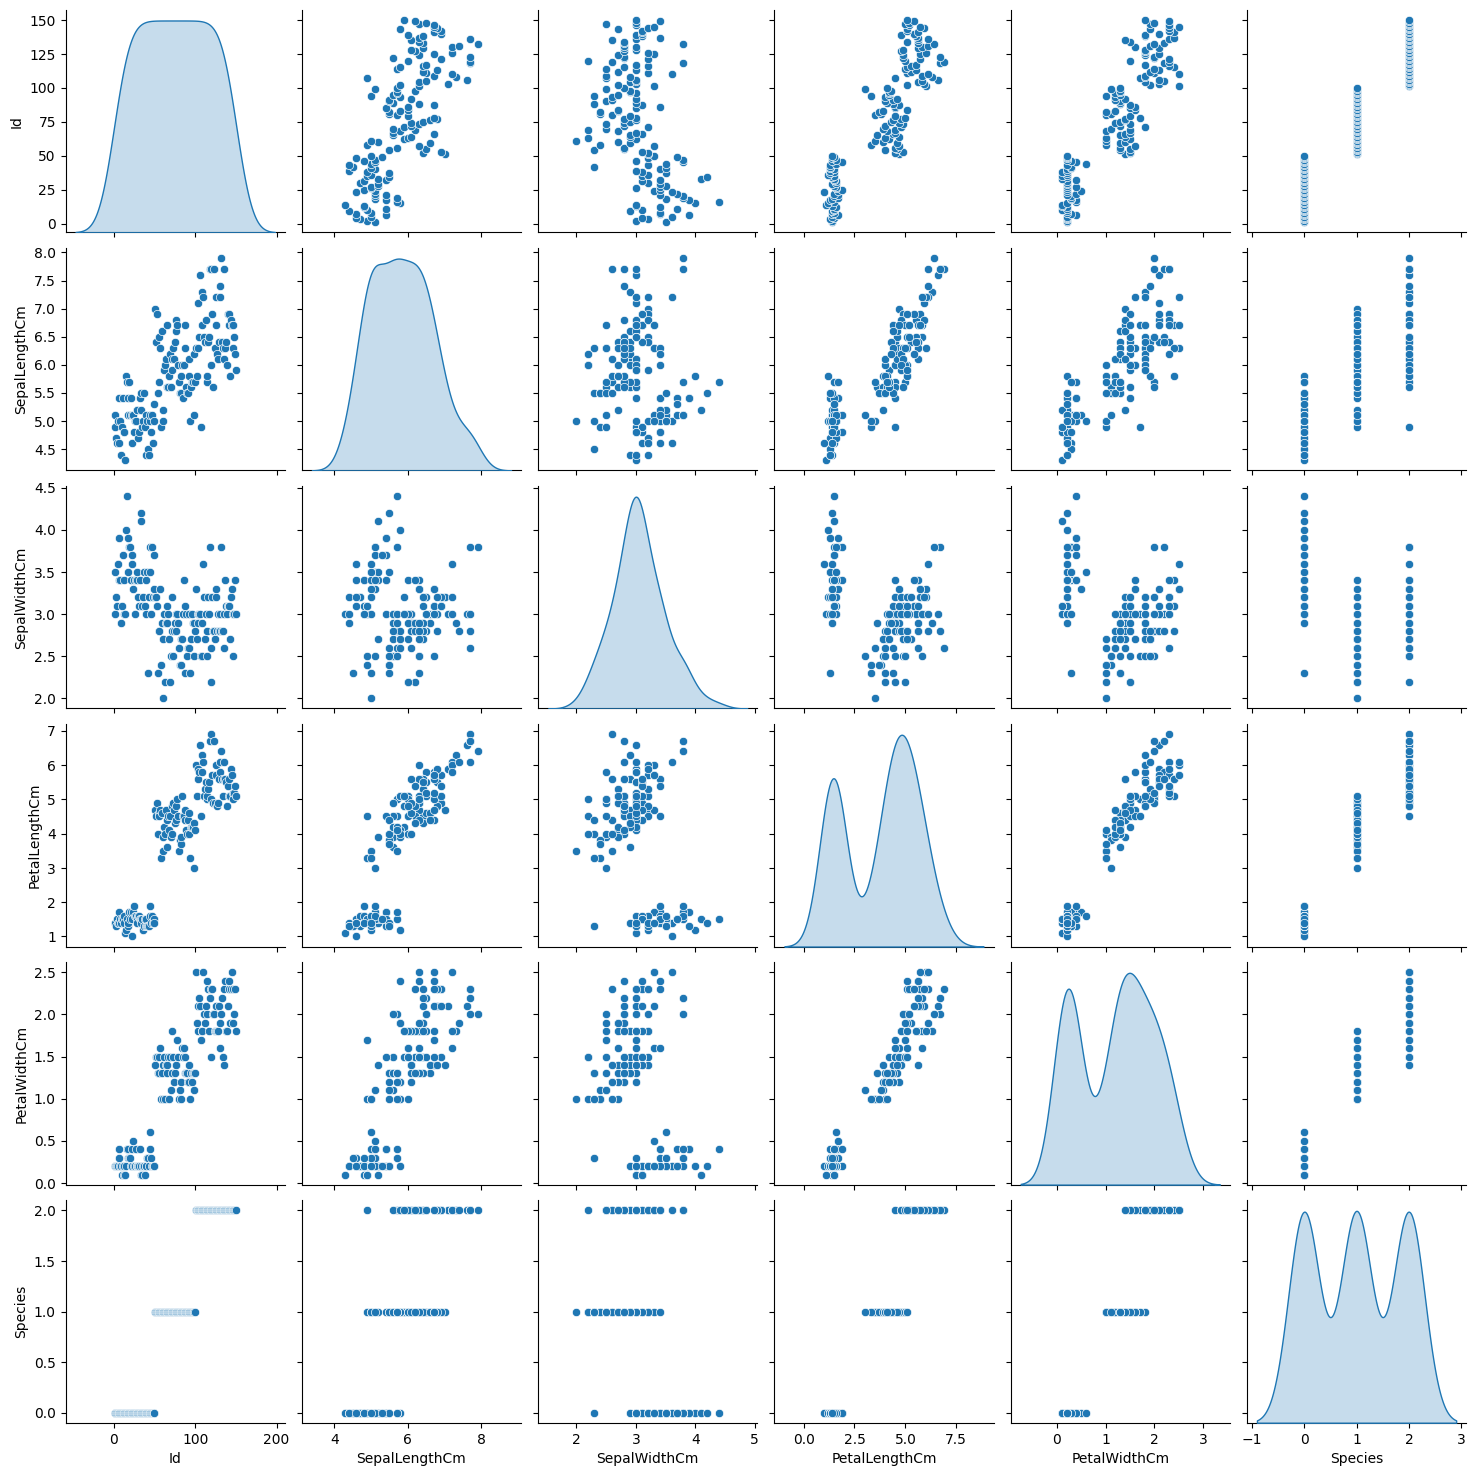

In [13]:
sns.pairplot(df_multi, diag_kind = 'kde')

### Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

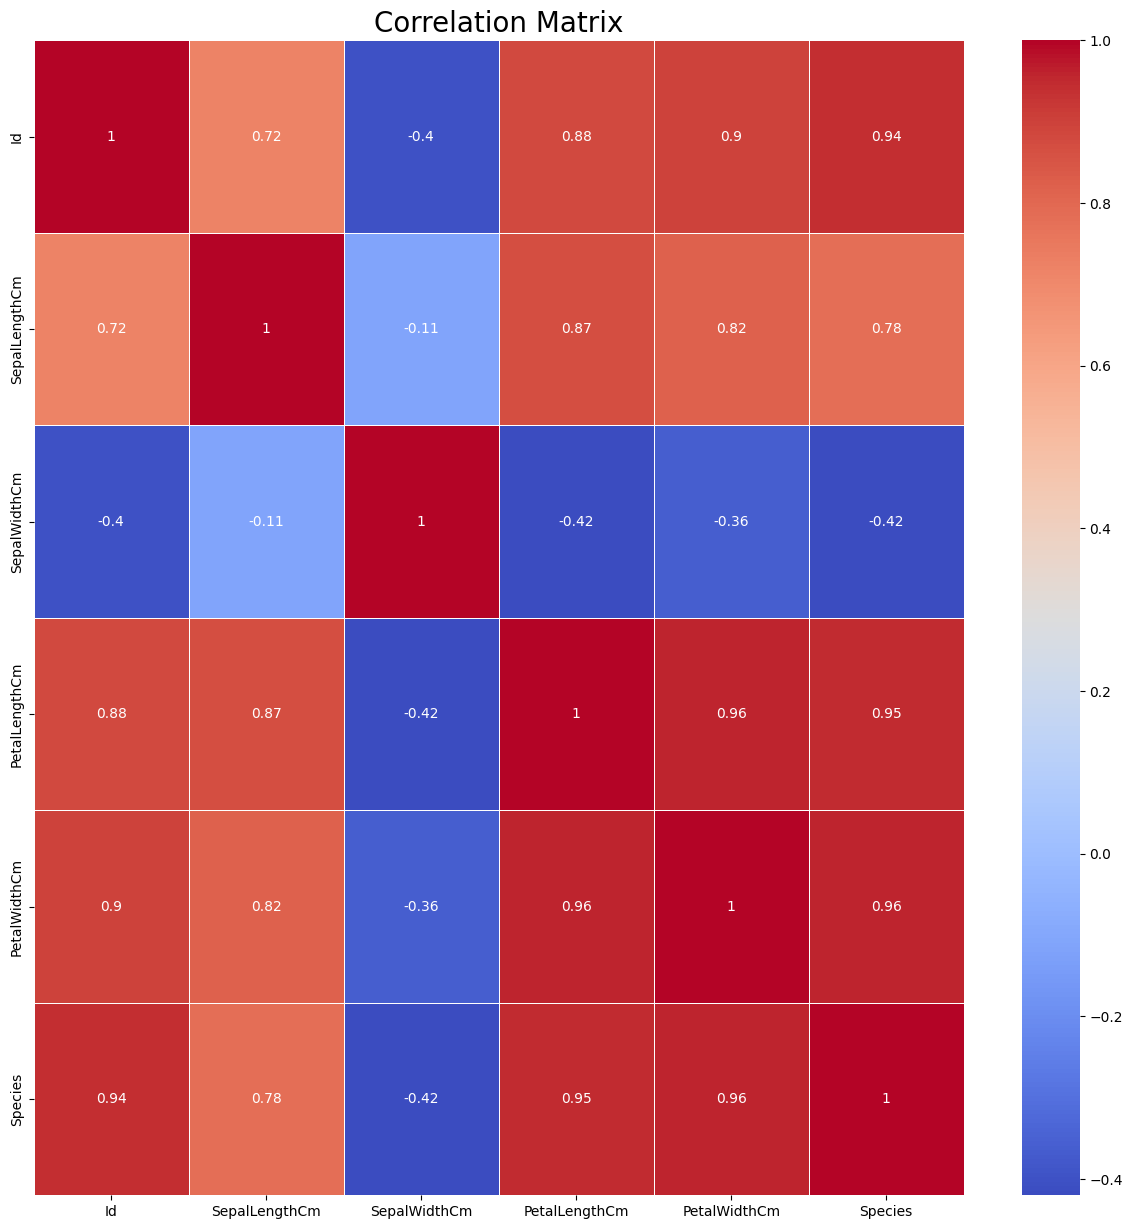

In [14]:
plt.figure(figsize=(15, 15))
correlation_matrix = df_multi.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

### Kesimpulan analisis multivariate

1. PetalLengthCm dan PetalWidthCm adalah fitur terpenting untuk prediksi Species karena korelasi hampir sempurna (≥0.95).
2. SepalLengthCm berguna sebagai pendukung, sementara SepalWidthCm kurang efektif karena korelasi negatif dan distribusi yang tumpang tindih.
3. Iris-setosa mudah diidentifikasi melalui petal yang kecil dan sepal lebar, sementara virginica dan versicolor lebih terbantu oleh fitur petal.
4. Rekomendasi: Untuk model klasifikasi, prioritaskan PetalWidthCm dan PetalLengthCm sebagai fitur utama, dengan SepalLengthCm sebagai pelengkap. SepalWidthCm dapat dipertimbangkan jika model memerlukan fitur tambahan, tetapi dampaknya mungkin terbatas.

# **5. Data Preprocessing**

Overview dataset setelah EDA:
1. Tidak ada data kosong / missing value
2. Tidak ada data duplikat
3. Terdapat outlier pada salah satu fitur/kolom
4. Fitur/kolom target bertipe data object/kategori

Proyek ini direncanakan menggunakan model machine learning random forest classify untuk klasifikasi fitur/kolom "Species", sehingga pada data preprocessing akan dilakukan:
1. enkoding fitur/kolom "Species"
2. normalisasi dengan MinMaxScaler
3. ekspor dataframe setelah data preprocessing

## Enkoding fitur/kolom "Species

In [15]:
df_preprocessing = df.copy()
species_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

df_preprocessing['Species'] = df_preprocessing['Species'].map(species_mapping)
df_preprocessing

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


## Normalisasi dengan MinMaxScaler

In [16]:
from sklearn.preprocessing import MinMaxScaler

X = df_preprocessing.drop(columns='Species')
y = df_preprocessing['Species']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = pd.DataFrame(X_scaled, columns=X.columns)

df_preprocessing = pd.concat([X_normalized, y], axis=1)
df_preprocessing

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.000000,0.222222,0.625000,0.067797,0.041667,0
1,0.006711,0.166667,0.416667,0.067797,0.041667,0
2,0.013423,0.111111,0.500000,0.050847,0.041667,0
3,0.020134,0.083333,0.458333,0.084746,0.041667,0
4,0.026846,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...,...
145,0.973154,0.666667,0.416667,0.711864,0.916667,2
146,0.979866,0.555556,0.208333,0.677966,0.750000,2
147,0.986577,0.611111,0.416667,0.711864,0.791667,2
148,0.993289,0.527778,0.583333,0.745763,0.916667,2


## Data Split

In [17]:
from sklearn.model_selection import train_test_split

X = df_preprocessing.drop(columns='Species')
y = df_preprocessing['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Ekspor

In [18]:
X_train.to_csv('iris_preprocessing/X_train.csv', index=False)
X_test.to_csv('iris_preprocessing/X_test.csv', index=False)
y_train.to_csv('iris_preprocessing/y_train.csv', index=False)
y_test.to_csv('iris_preprocessing/y_test.csv', index=False)

print("File berhasil disimpan di folder 'iris_preprocessing':")

File berhasil disimpan di folder 'iris_preprocessing':
